Kaggle Competition: BBC News Classification    
A Jupyter notebook with exploratory data analysis (EDA) procedure, model building and training, and comparison with supervised learning. 



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
import warnings
warnings.filterwarnings('ignore')

csv files have been downloaded from kaggle and uploaded to my github repo so we can read_csv from http link

In [60]:
df_train = pd.read_csv("https://raw.githubusercontent.com/gt2onew/dtsa5510/main/week4/BBC%20News%20Train.csv")

In [61]:
df_test = pd.read_csv("https://raw.githubusercontent.com/gt2onew/dtsa5510/main/week4/BBC%20News%20Test.csv")

# Exploratory Data Analysis (EDA)

## Inspect

In [62]:
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [64]:
df_train.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [65]:
df_train.Category.value_counts().sum()

1490

In [66]:
df_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB




*   Training data has 3 columns 'ArticleId', 'Text', 'Category'
*   Test data has 2 columns 'ArticleId', 'Text', so we have to submit result in kaggle to get accuracy
*   1490 samples on train and 735 samples on test
*   'Text' field is english free text
*   'Category' field has 5 unique values ['business', 'tech', 'politics', 'sport', 'entertainment'], no null/nan value
*   Each category has a good representation in entire training dataset considering its count







## Visualize

(array([336.,   0., 261.,   0.,   0., 274.,   0., 346.,   0., 273.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

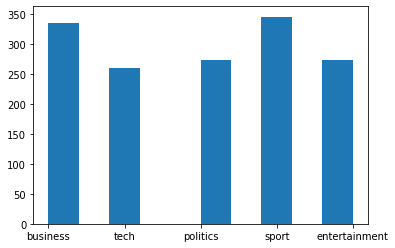

In [68]:
plt.hist(df_train.Category)


## Clean

In [69]:
import nltk

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string


In [73]:
translator = str.maketrans('', '', string.punctuation)


We use nltk library to clean the 'Text' data with following steps:  
1. Remove stopwords  
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”), By removing these words, we remove the low-level information from our text in order to give more focus to the important information.
2. Remove punctuation
Same reason as above to focus more on the core information of text
3. Stemming  
"Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."  
Stem (root) is the part of the word to which you add inflectional (changing/deriving) affixes such as (-ed,-ize, -s,-de,mis). So stemming a word or sentence may result in words that are not actual words. Stems are created by removing the suffixes or prefixes used with a word.  

Reference:  
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/  
https://www.guru99.com/stemming-lemmatization-python-nltk.html  
https://www.datacamp.com/tutorial/stemming-lemmatization-python

In [74]:
def preprocessDataset(train_text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(train_text)
  words = [word for word in words if not word in stop_words]
  stemmer= PorterStemmer()
  stem_text=' '.join([stemmer.stem(word.translate(translator)) for word in words])
  return stem_text


Check 1 sample below to compare text before and after clean-up

In [75]:
preprocessDataset(df_train.iloc[0].Text)

'worldcom exboss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit  cynthia cooper worldcom exhead intern account alert director irregular account practic us telecom giant 2002 warn led collaps firm follow discoveri  11bn  £57bn  account fraud  mr ebber plead guilti charg fraud conspiraci  prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim  ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002 said andersen given green light procedur practic use worldcom  mr ebber lawyer said unawar fraud argu auditor alert problem  ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer  prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book  howev ms cooper said mr 

In [76]:
df_train.iloc[0].Text

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [77]:
df_train['TextCleaned'] = df_train['Text'].apply(preprocessDataset)


In [78]:
df_train['TextCleaned']

0       worldcom exboss launch defenc lawyer defend fo...
1       german busi confid slide german busi confid fe...
2       bbc poll indic econom gloom citizen major nati...
3       lifestyl govern mobil choic faster better funk...
4       enron boss  168m payout eighteen former enron ...
                              ...                        
1485    doubl evict big brother model capric holbi cit...
1486    dj doubl act revamp chart show dj duo jk joel ...
1487    weak dollar hit reuter revenu media group reut...
1488    appl ipod famili expand market appl expand ipo...
1489    santi worm make unwelcom visit thousand websit...
Name: TextCleaned, Length: 1490, dtype: object

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer


Next we need to  build feature vectors from text documents.   
There are many libraries to transform text data to numerics for machine learning, but for this week's topic, understanding NMF is the most important, so I used the most simple one TfidfVectorizer.  
TF-IDF, or term frequency-inverse document frequency, is a figure that expresses the statistical importance of any given word to the document collection as a whole.  
It is a way of normalizing the frequency of words in a document so that they can be compared across documents.  
TF: Number of times a word appears in a document/number of words in the document.  
IDF: log(Number of documents / Number of documents that contain the word).  
TF-IDF = TF * IDF  
  
Reference:  
https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a  
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer  

In [80]:
vect = TfidfVectorizer()
X = vect.fit_transform(df_train.TextCleaned)
X

<1490x19646 sparse matrix of type '<class 'numpy.float64'>'
	with 218395 stored elements in Compressed Sparse Row format>

In [81]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02407628, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02546556, 0.        , ..., 0.        , 0.        ,
        0.        ]])

Now each sample has 19646 features

# Building and training models

In [82]:
from sklearn.decomposition import NMF


In [83]:
# since we target to predict text falling into 1 of 5 categories, set n_components=5
model = NMF(n_components=5, random_state=42)
W = model.fit_transform(X)
H = model.components_

In [84]:
W.shape

(1490, 5)

In [85]:
H.shape

(5, 19646)

In [86]:
W

array([[6.95884513e-04, 4.07745876e-02, 1.24580365e-02, 5.29975892e-03,
        5.88770642e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.14685309e-01],
       [1.47780777e-02, 3.35264888e-02, 2.23558669e-02, 0.00000000e+00,
        1.21466231e-01],
       ...,
       [8.31887349e-03, 0.00000000e+00, 1.13497321e-04, 8.25120090e-03,
        1.61090898e-01],
       [0.00000000e+00, 0.00000000e+00, 2.19113415e-01, 1.38308361e-02,
        2.42128574e-02],
       [0.00000000e+00, 0.00000000e+00, 1.16072401e-01, 0.00000000e+00,
        0.00000000e+00]])

In [87]:
predicted_label = np.squeeze(np.asarray(W.argmax(axis=1)))


In [88]:
predicted_label

array([4, 4, 4, ..., 4, 2, 2])

In [89]:
predicted_label.shape

(1490,)

In [90]:
type(predicted_label)

numpy.ndarray

**Now we need to find mapping between predicted label to ['business', 'tech', 'politics', 'sport', 'entertainment']**

In [91]:
label_to_categ = {}

In [92]:
for i in range(5):
  label_to_categ[i] = df_train.iloc[np.where(predicted_label == i)[0]]['Category'].value_counts().idxmax()

In [93]:
label_to_categ

{0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [95]:
predicted_categ = np.vectorize(label_to_categ.get)(predicted_label)
predicted_categ

array(['business', 'business', 'business', ..., 'business', 'tech',
       'tech'], dtype='<U13')

In [96]:
# check metrics on df_train
accuracy_score(df_train.Category, predicted_categ)

0.9187919463087248

In [97]:
confusion_matrix(df_train.Category, predicted_categ)

array([[312,   1,  13,   0,  10],
       [ 10, 226,   6,   3,  28],
       [ 18,   0, 249,   3,   4],
       [  2,   4,   0, 340,   0],
       [  4,   6,   3,   6, 242]])

**Now apply model on df_test then submit to kaggle for accuracy score**

In [98]:
test_pred_categ = np.vectorize(label_to_categ.get)(model.transform(vect.transform(df_test['Text'].apply(preprocessDataset))).argmax(axis=1))

In [99]:
type(test_pred_categ)

numpy.ndarray

In [100]:
test_pred_categ.shape

(735,)

In [101]:
df_test['Category'] = test_pred_categ

In [102]:
df_test

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,business
731,373,u2 to play at grammy awards show irish rock ba...,entertainment
732,1704,sport betting rules in spotlight a group of mp...,tech
733,206,alfa romeos to get gm engines fiat is to sto...,business


In [103]:
df_test.drop(['Text'], axis = 1).to_csv('submission.csv', index = False)


**Score: 0.92653 (From kaggle)**

**Change hyperparameter(s) and record the results**  
This week we learned different loss functionss of NMF, which corresponds to beta_loss hyperparam of sklearn.decomposition.NMF  
beta_lossfloat or {‘frobenius’, ‘kullback-leibler’, ‘itakura-saito’}, default=’frobenius’  
Lets try ‘kullback-leibler’, ‘itakura-saito’  

In [104]:
model_kl = NMF(n_components=5, random_state=42, solver = 'mu', beta_loss = 'kullback-leibler')
W_kl = model_kl.fit_transform(X)
predicted_label_kl = np.squeeze(np.asarray(W_kl.argmax(axis=1)))
label_to_categ_kl = {}
for i in range(5):
  label_to_categ_kl[i] = df_train.iloc[np.where(predicted_label_kl == i)[0]]['Category'].value_counts().idxmax()
print(label_to_categ_kl)
test_pred_categ_kl = np.vectorize(label_to_categ_kl.get)(model_kl.transform(vect.transform(df_test['Text'].apply(preprocessDataset))).argmax(axis=1))
df_test['Category'] = test_pred_categ_kl
df_test.drop(['Text'], axis = 1).to_csv('submission_kl.csv', index = False)

{0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}


**Score: 0.94013 (From kaggle)**

Note that for beta_loss <= 0 (or ‘itakura-saito’), the input matrix X cannot contain zeros. So we need to add a small positive number.

In [105]:
model_is = NMF(n_components=5, random_state=42, solver = 'mu', beta_loss = 'itakura-saito')
W_is = model_is.fit_transform(X.todense()+0.00000001)
predicted_label_is = np.squeeze(np.asarray(W_is.argmax(axis=1)))
label_to_categ_is = {}
for i in range(5):
  label_to_categ_is[i] = df_train.iloc[np.where(predicted_label_is == i)[0]]['Category'].value_counts().idxmax()
print(label_to_categ_is)
test_pred_categ_is = np.vectorize(label_to_categ_is.get)(model_is.transform(vect.transform(df_test['Text'].apply(preprocessDataset)).todense()+0.00000001).argmax(axis=1))
df_test['Category'] = test_pred_categ_is
df_test.drop(['Text'], axis = 1).to_csv('submission_is.csv', index = False)

{0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}


**Score: 0.54829 (From kaggle)**  
**So itakura-saito is not a good fit for this project**

**Improve the model performance**

We can see from above that kullback-leibler loss function gives best accuracy Score: 0.94013, let's shift focus on word embedding part to see if we can tune for better performance.  
We will tune param  
min_df, float or int, default=1  
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature.  
Lets try value 10, 50, 100

In [106]:
for min_df in [10,50,100]:
  vect = TfidfVectorizer(min_df = min_df)
  X = vect.fit_transform(df_train.TextCleaned)
  model_kl = NMF(n_components=5, random_state=42, solver = 'mu', beta_loss = 'kullback-leibler')
  W_kl = model_kl.fit_transform(X)
  predicted_label_kl = np.squeeze(np.asarray(W_kl.argmax(axis=1)))
  label_to_categ_kl = {}
  for i in range(5):
    label_to_categ_kl[i] = df_train.iloc[np.where(predicted_label_kl == i)[0]]['Category'].value_counts().idxmax()
  print(label_to_categ_kl)
  test_pred_categ_kl = np.vectorize(label_to_categ_kl.get)(model_kl.transform(vect.transform(df_test['Text'].apply(preprocessDataset))).argmax(axis=1))
  df_test['Category'] = test_pred_categ_kl
  df_test.drop(['Text'], axis = 1).to_csv('min_df_'+str(min_df)+'_submission_kl.csv', index = False)

{0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}
{0: 'business', 1: 'sport', 2: 'business', 3: 'entertainment', 4: 'tech'}
{0: 'business', 1: 'sport', 2: 'entertainment', 3: 'politics', 4: 'tech'}


min_df not set -> Score: 0.94013  
min_df 10      -> Score: 0.94013  
min_df 50      -> Score: 0.68707  
min_df 100     -> Score: 0.87619

**Maybe because we have already cleaned up stop words and meaningless items, from above comparison, it is best to keep all the terms**

# Compare with supervised learning

**We will use RandomForestClassifier here**

In [107]:
from sklearn.ensemble import RandomForestClassifier


In [108]:
rfc = RandomForestClassifier(random_state=42)


In [109]:
rfc.fit(X, df_train.Category)

RandomForestClassifier(random_state=42)

In [113]:
# training data predict accuracy
rfc.score(X, df_train.Category)

1.0

In [112]:
df_test['Category'] = rfc.predict(vect.transform(df_test['Text'].apply(preprocessDataset)))
df_test.drop(['Text'], axis = 1).to_csv('submission_rfc.csv', index = False)


**Score: 0.94557 (From kaggle)**

changing the train data size (e.g., Include only 10%, 20%, 50% of labels, and observe train/test performance changes). Which methods are data-efficient (require a smaller amount of data to achieve similar results)? 

In [114]:
for frac in [0.1,0.2,0.5]:
  df_train_sample = df_train.sample(frac=frac, random_state=42)
  df_train_sample['TextCleaned'] = df_train_sample['Text'].apply(preprocessDataset)
  #nmf kl
  vect = TfidfVectorizer()
  X = vect.fit_transform(df_train_sample.TextCleaned)
  model_kl = NMF(n_components=5, random_state=42, solver = 'mu', beta_loss = 'kullback-leibler')
  W_kl = model_kl.fit_transform(X)
  predicted_label_kl = np.squeeze(np.asarray(W_kl.argmax(axis=1)))
  label_to_categ_kl = {}
  for i in range(5):
    label_to_categ_kl[i] = df_train_sample.iloc[np.where(predicted_label_kl == i)[0]]['Category'].value_counts().idxmax()
  print(label_to_categ_kl)
  test_pred_categ_kl = np.vectorize(label_to_categ_kl.get)(model_kl.transform(vect.transform(df_test['Text'].apply(preprocessDataset))).argmax(axis=1))
  df_test['Category'] = test_pred_categ_kl
  df_test.drop(['Text'], axis = 1).to_csv('submission_kl_frac'+str(frac)+'.csv', index = False)
  #rfc
  rfc = RandomForestClassifier(random_state=42)
  rfc.fit(X, df_train_sample.Category)
  df_test['Category'] = rfc.predict(vect.transform(df_test['Text'].apply(preprocessDataset)))
  df_test.drop(['Text'], axis = 1).to_csv('submission_rfc_frac'+str(frac)+'.csv', index = False)

{0: 'tech', 1: 'politics', 2: 'entertainment', 3: 'business', 4: 'sport'}
{0: 'sport', 1: 'politics', 2: 'business', 3: 'entertainment', 4: 'tech'}
{0: 'tech', 1: 'politics', 2: 'sport', 3: 'entertainment', 4: 'business'}


10% train data  


*   NMF (kl) Score: 0.82857
*   RandomForestClassifier Score: 0.84897

20% train data  


*   NMF (kl) Score: 0.93197
*   RandomForestClassifier Score: 0.93605

50% train data  


*   NMF (kl) Score: 0.91564
*   RandomForestClassifier Score: 0.95102  

100% train data  


*   NMF (kl) Score: 0.94013 
*   RandomForestClassifier Score: 0.94557

**Observation**  


*   Both NMF and RFC are data-efficient that 20% of training data can produce good results >90% test accuracy, NMF works slightly better comparing the improvement from 10% training data to 20%
*   RFC with 100% training data has overfitting problem, it can get 1.0 accuracy for training data while <95% for testing data

